IMPORTING THE REQUIRED LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

IMPORTING THE DATASET

In [3]:
wine=pd.read_csv('winequality-red.csv')

In [4]:
print(wine.shape)
wine.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


CHECKING FOR NULL VALUES 

In [5]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


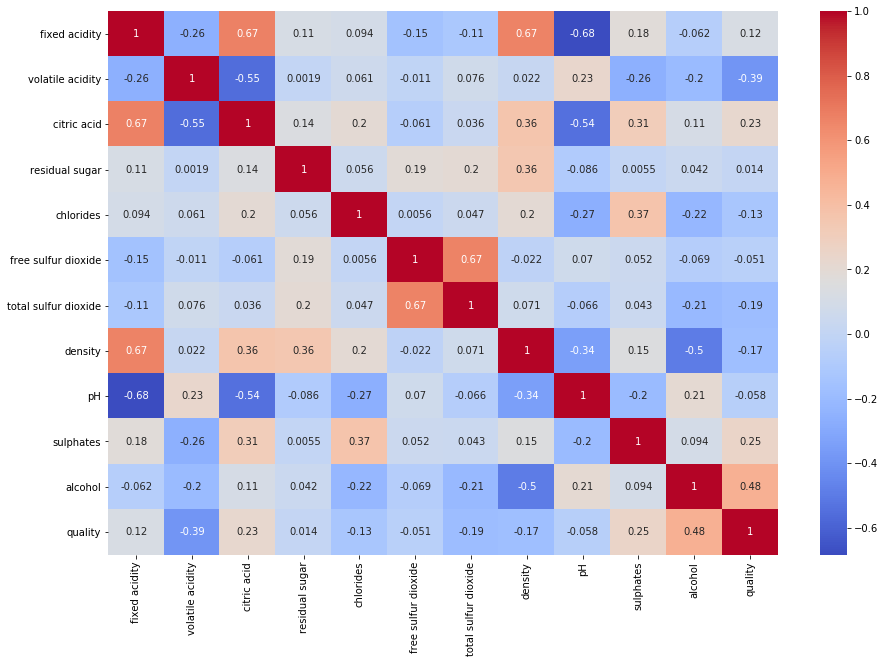

In [7]:
plt.subplots(figsize=(15, 10))
sns.heatmap(wine.corr(), annot = True, cmap = 'coolwarm')

from this correlatipon we get to know that the quality of wine mostly depends upon fixed acidity,citric acid,residual sugar
sulphates and the most upon the alcohol content hence, we will further do the exploratory data analysis on these columns

In [8]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

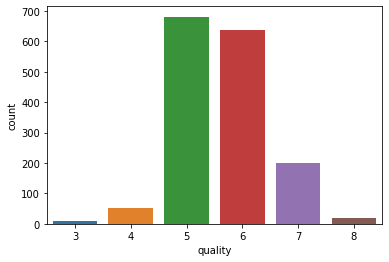

In [9]:
sns.countplot(wine['quality'])

*Exploratory Data Analysis:*

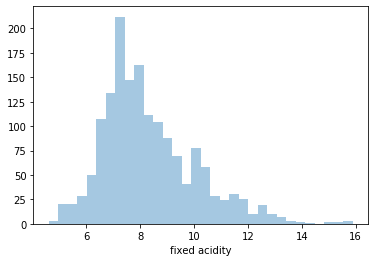

In [10]:
#histogram plot

sns.distplot(wine['fixed acidity'],kde=False)

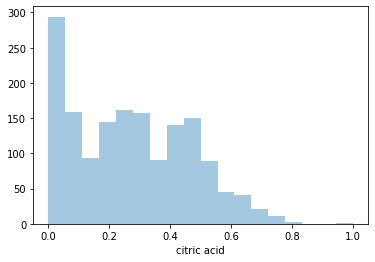

In [11]:
sns.distplot(wine['citric acid'],kde=False)

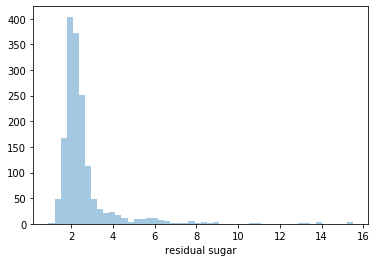

In [12]:
sns.distplot(wine['residual sugar'],kde=False)

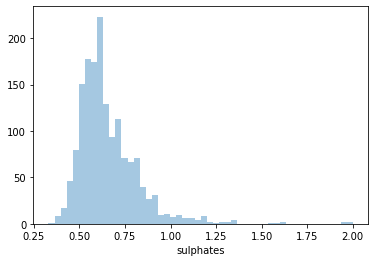

In [13]:
sns.distplot(wine['sulphates'],kde=False)

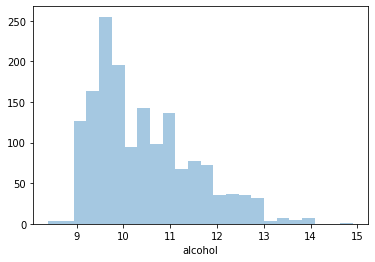

In [14]:
sns.distplot(wine['alcohol'],kde=False)

Univariate Analysis:

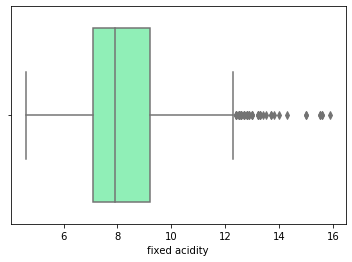

In [15]:
#box plot
sns.boxplot(x='fixed acidity',data=wine,palette='rainbow')

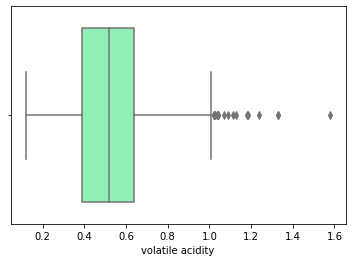

In [16]:
sns.boxplot(x='volatile acidity',data=wine,palette='rainbow')

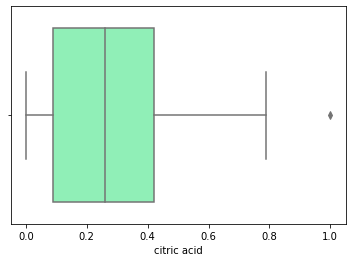

In [17]:
sns.boxplot(x='citric acid',data=wine,palette='rainbow')

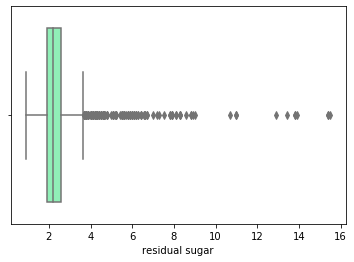

In [18]:
sns.boxplot(x='residual sugar',data=wine,palette='rainbow')

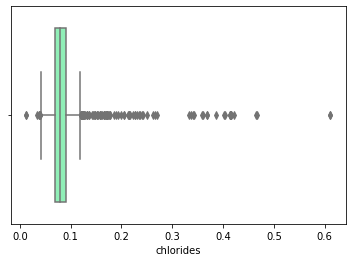

In [19]:
sns.boxplot(x='chlorides',data=wine,palette='rainbow')

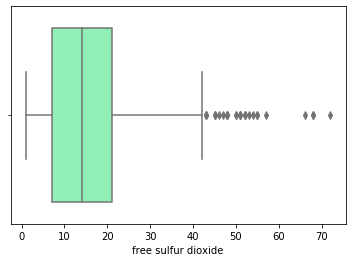

In [20]:
sns.boxplot(x='free sulfur dioxide',data=wine,palette='rainbow')

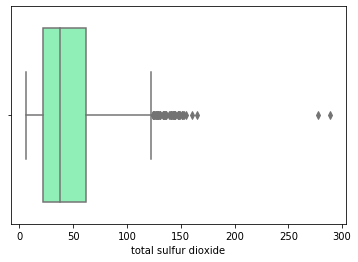

In [21]:
sns.boxplot(x='total sulfur dioxide',data=wine,palette='rainbow')

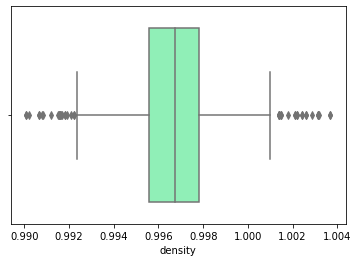

In [22]:
sns.boxplot(x='density',data=wine,palette='rainbow')

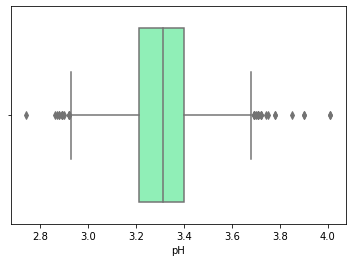

In [23]:
sns.boxplot(x='pH',data=wine,palette='rainbow')

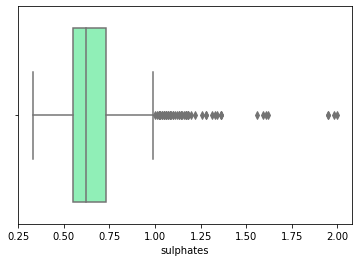

In [24]:
sns.boxplot(x='sulphates',data=wine,palette='rainbow')

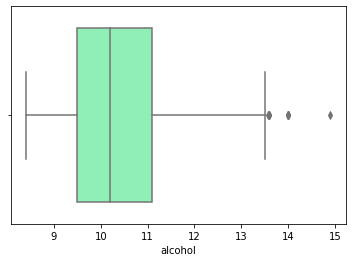

In [25]:
sns.boxplot(x='alcohol',data=wine,palette='rainbow')

Bivariate analysis:

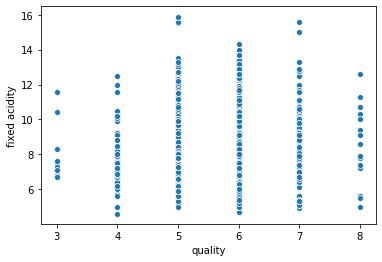

In [26]:
 sns.scatterplot(x="quality", y="fixed acidity", data=wine)

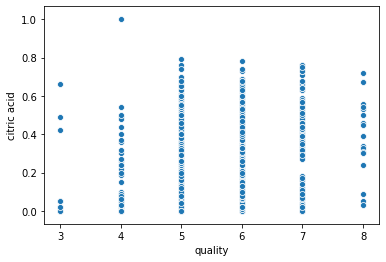

In [27]:
 sns.scatterplot(x="quality", y="citric acid", data=wine)

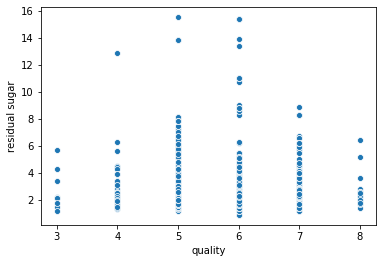

In [28]:
sns.scatterplot(x="quality", y='residual sugar', data=wine)

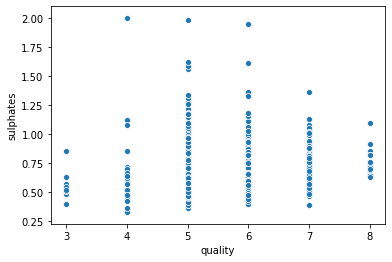

In [29]:
sns.scatterplot(x="quality", y="sulphates", data=wine)

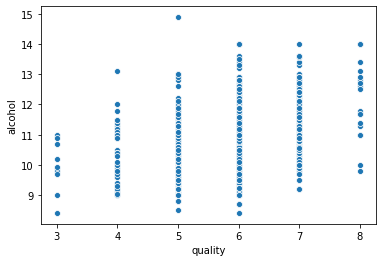

In [30]:
sns.scatterplot(x="quality", y="alcohol", data=wine)

PREPROCESSING THE DATA

In [31]:
bins = (2, 6.5, 8)
group_names = [0,1]
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

as mentioned in the source the wine quality between 2 to 6.5 is considered bad ie '0' and between 6.5 to 8 is considered 
good i.e '1'

In [32]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [33]:
le= LabelEncoder()

In [34]:
wine['quality'] = le.fit_transform(wine['quality'])

In [35]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

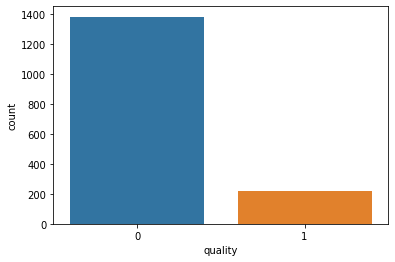

In [36]:
sns.countplot(wine['quality'])

MODELLING

In [37]:
X = wine[['fixed acidity', 'citric acid',
               'residual sugar', 'sulphates', 'alcohol']]
y = wine['quality']

Split the dataset using “train-test-split” function.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [39]:
sc = StandardScaler()

In [40]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [49]:
import numpy as np
error_rate = []
for i in range(1,40):
 
 knc = KNeighborsClassifier(n_neighbors=i)
 knc.fit(X_train,y_train)
 pred_i = knc.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

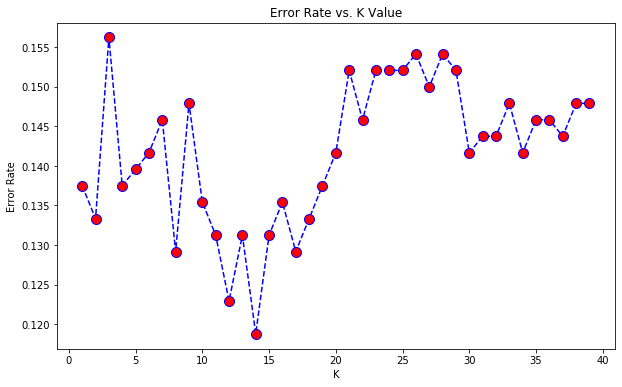

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [56]:
print(confusion_matrix(y_test,pred))

[[403   9]
 [ 48  20]]


In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       412
           1       0.69      0.29      0.41        68

    accuracy                           0.88       480
   macro avg       0.79      0.64      0.67       480
weighted avg       0.86      0.88      0.86       480



Apply KNN classification on “quality” column of the dataset. Select the
appropriate features

In [41]:
#without mentioning n_neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))

[[385  27]
 [ 40  28]]


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       412
           1       0.51      0.41      0.46        68

    accuracy                           0.86       480
   macro avg       0.71      0.67      0.69       480
weighted avg       0.85      0.86      0.85       480



ACCURACY---- 0.88